# ImageNet Dataset과 ILSVRC 경진대회

## ImageNet Dataset
- https://www.image-net.org/
- 웹상에서 수집한 약 1500만장의 라벨링된 고해상도 이미지로 약 22,000개 카테고리로 구성된 대규모 Image 데이터셋.

## <span style='background-color:#fff5b1'>ILSVRC(ImageNet Large Scale Visual Recognition Challenge) 대회
- https://image-net.org/challenges/LSVRC/
- 2010년 부터 2017년 까지 진행된 컴퓨터 비전 경진대회.
- ImageNet의 이미지중 **1000개 카테고리 약 120만장의 학습용이미지, 5만장의 검증 이미지, 15만장의 테스트 이미지를** 이용해 대회를 진행한다.
- **2012년** CNN기반 딥러닝 알고리즘인 **AlexNet**이 2위와 큰 차이로 우승하며 이후 딥러닝 알고리즘이 대세가 되었다. 특히 2015년 우승한 ResNet은 0.036의 에러율을 보이며 우승했는데 이는 사람이 에러율이라 알려진 0.05 보다 높은 정확도였다.
- ILSVRC에서 우승하거나 좋은 성적을 올린 모델들이 컴퓨터 비전분야 발전에 큰 역할을 해왔으며 이후 다양한 Computer Vision 분야의 네트워크 모델의 백본(backbone)으로 사용되고 있다.

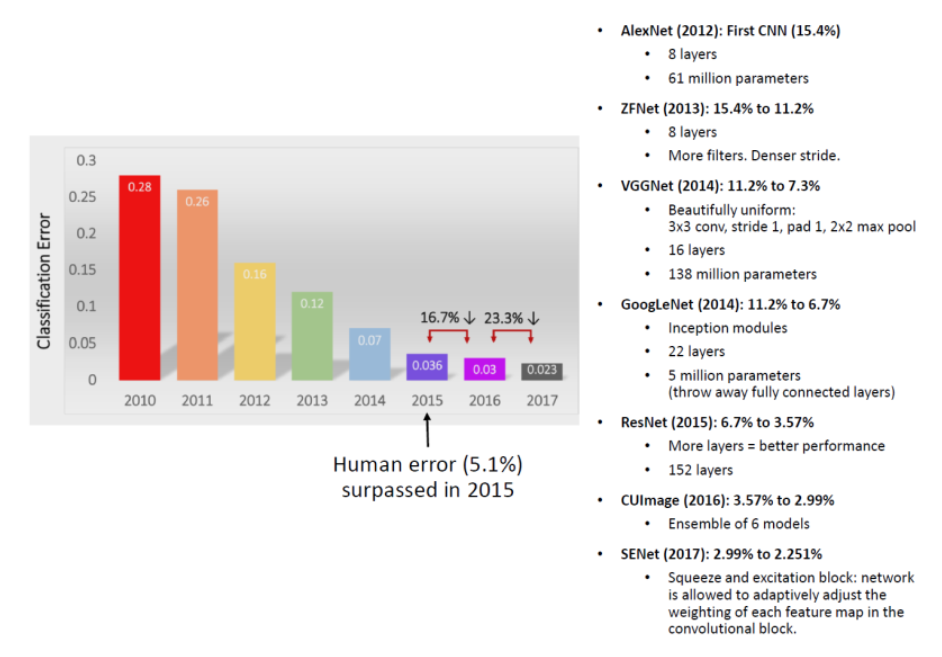

# 주요 CNN 모델
- CNN 기반의 주요 모델들과 그 모델에 쓰인 주요 기법들을 알아본다.

    - VGGNet
    - ResNet
    - Mobilenet

##  <span style='background-color:#fff5b1'>VGGNet(VGG16)
- VGG(Visual Geometry Group)

- ImageNet ILSVRC Challenge 2014에서 2등한 모델로 Simonyan and Zisserman(Oxford Univ.)에 의해 제안
    - VGGNet이 준우승을 하긴 했지만, 구조의 간결함과 사용의 편이성으로 인해 1등한 GoogLeNet보다 더 각광받았다
    - 단순한 구조이지만 좋은 성능을 보여 이후 다양한 Computer Vision Network 모델에서 Feature 추출을 위한<span style='background-color:#fff5b1'> Backbone Network으로 많이 사용되었다.

- 네트워크 깊이가 어떤 영향을 주는 지 연구 하기 위해 설계된 네트워크로 모든 Layer에서 동일한 kernel size(3 x 3)의 필터를 사용했으며 filter(kernel)의 개수를 늘려가며 레이어를 쌓는 방식으로 구성됨.
    - 11 layer, 13 layer, 16 layer, 19 layer 의 네트워크를 테스트함.
        - 이 중 VGG-16 모델이 2014년도 ILSVRC 대회에 참가한 모델임.
    - 19 layer의 성능이 16 layer보다 크게 나아지지 않았고 21개 Layer를 쌓은 모델은 성능이 떨어졌다.

- Filter의 수를 64, 128, 256, 512 두 배씩 키움.

- 모든 layer들에 **$3 \times 3$ filter, stride=1, same padding의 Convolution Layer**와 **$2\times 2$, stride=2의 MaxPooling** 사용
    - 이전 AlexNet이 5 X 5 필터를 사용했는데 VGG16은 3 X 3 필터의 Layer를 두개 연속으로 연결했다.
        - <span style='background-color:#fff5b1'> **3 x 3 필터 두개를 쌓는 것이 5 x 5  하나를 사용하는 보다 더 적은 파라미터를 사용하며 성능이 더 좋았다.**
        - <span style='background-color:#fff5b1'>5 X 5 = 25 보다, 3 X 3 = 9 인 convoulution layer 가 2개여도 18이기에 성능면에서 더 좋다.
    - Feature map의 사이즈를 convolution layer가 아닌 Max Pooling 을 사용해 줄여줌.
    - layer가 총 16개 사용된다. <span style='background-color:#fff5b1'>**(maxpooling layer는 포함 X , weight 있는 것들만 개수에 친다.)**
   

- VGG16의 단점은 마지막에 분류를 위해 Fully Connected Layer 3개를 붙여 파라미터 수가 너무 많아 졌다. 약 1억4천만 개의 parameter(가중치)중 1억 2천만개 정도가 Fully Connected Layer의 파라미터 임. 

- **구조**
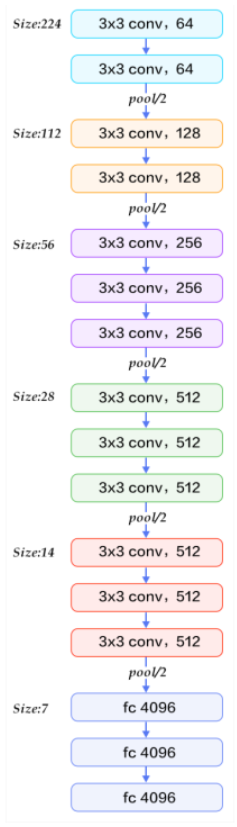

## <span style='background-color:#fff5b1'>ResNet (Residual Networks)
- 2015년 마이크로소프트 리서치 팀에서 제안한 신경망구조로 <span style='background-color:#fff5b1'>**잔차모듈(Residual module)**</span> 과 <span style='background-color:#fff5b1'>**skip connection**</span> 이라는 구조가 사용됨
- **Skip connection(Shortcut connection)기법을 이용해 Layer수를 획기적으로 늘린 CNN 모델**로 ILSVRC 2015년 대회에서 우승을 차지함.

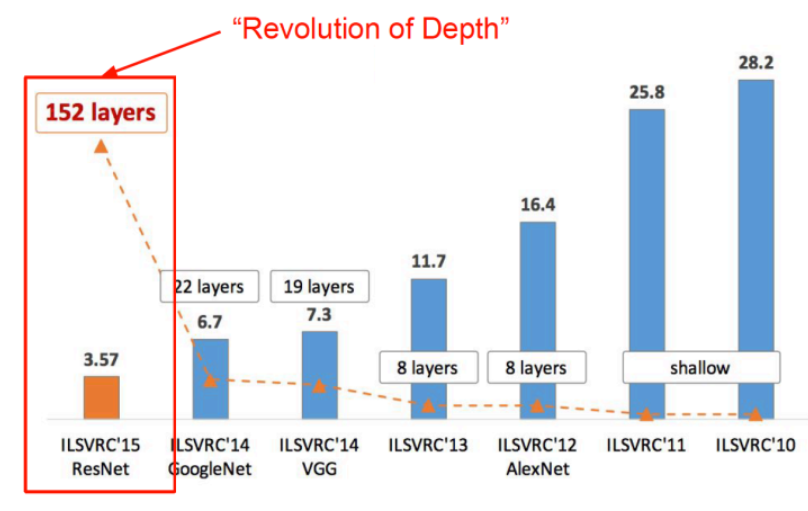

- "레이어를 깊게 쌓으면 성능이 더 좋아 지지 않을까?" 라는 가설에서 시작
    - Layer를 깊게 쌓으면 비선형성이 더 많이 추가 되된다. 그럼 더 많은 특성들을 추출 할 수 있기 때문에 네트워크 모델의 성능이 <span style='background-color:#fff5b1'>**더 좋아 질 수 있다.**
    - 실제는 Test 셋 뿐만 아니라 Train Set에서도 성능이 나쁘게 나옴.
- Train set에서도 성능이 나쁘게 나온 것은 최적화 문제로 보고, 레이어를 깊게 쌓으면 최적화 하기가 어렵다고 생각함. 
    - Layer를 깊게 쌓으면 weight들이 더 많이 생기므로 최적화가 어려워진다. 
    
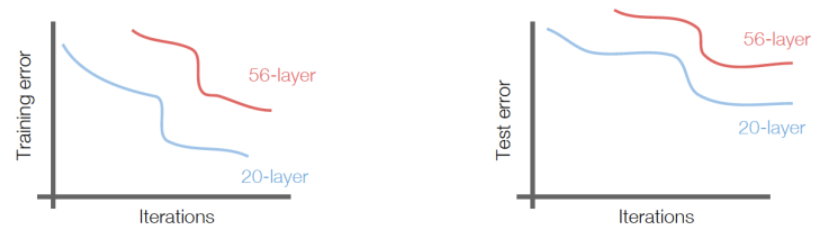

### Idea
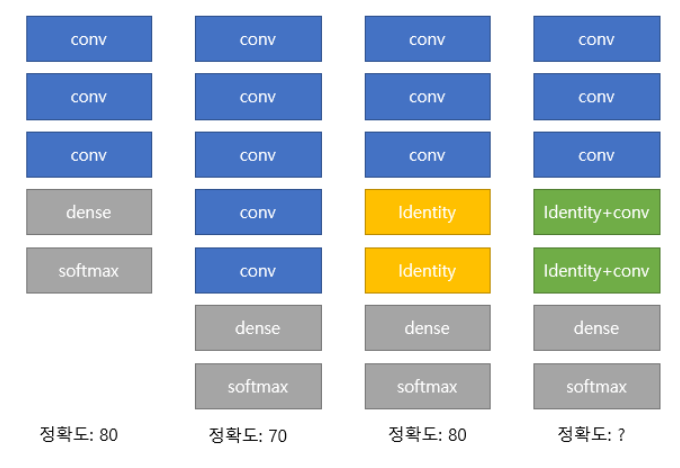

- 입력값을 그대로 출력하는 identity block 을 사용하면 성능이 떨어지지는 않는다.
- 그럼 Convloution block을 identity block으로 만들면 최소한 성능은 떨어지지 않고 깊은 Layer를 쌓을 수 있지 않을까?

### Solution
- <span style='background-color:#fff5b1'> **Residual block(잔차블럭)**
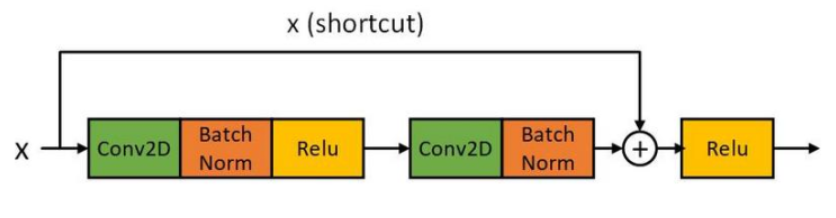

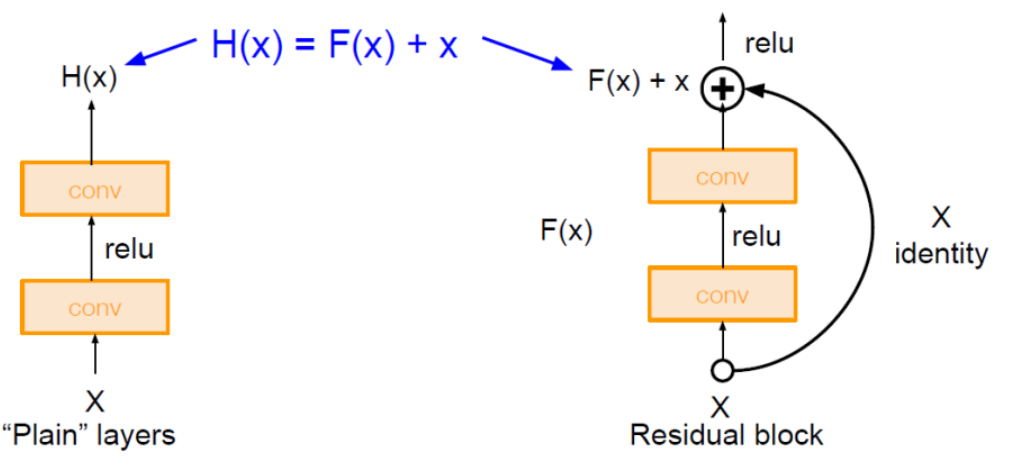

- F(x)는 입력과의 차이 => 최소화

- 기존 Layer들의 목표는 입력값인 X를 출력값인 Y로 최적의 매핑할 수 있는 함수 H(X)를 찾는 것이다. 그래서 H(X) – Y 가 최소값이 되는 방향으로 학습을 진행하면서 H(X)를 찾음. 그런데 레이어가 깊어지면서 최적화에 어려움으로 성능이 떨어지는 문제가 발생

- ResNet은 layer를 통과해서 나온 값이 **입력값과 동일하게 만드는 것을 목표로 하는 Identity block을** 구성한다.
- Identity block은 입력값 X를 레이어를 통과시켜서 나온 Y에 입력값 X를 더해서 합치도록 구성한다.

$$\large H(x) = F(x) + x\\x: input,\;H(x): output,\;F(x): layer통과값$$ 
 
 
- 목표는 $H(x)$(레이어통과한 값) 가 input인 x와 동일한 것이므로 F(x)를 0으로 만들기 위해 학습을 한다. 
- $F(x)$는 **잔차(Residual)** 가 된다. 그리고 잔차인 $F(x)$가 0이 되도록 학습하는 방식이므로 Residual Learning이라고 한다.
- 입력인 x를 직접 전달하는 것을 **shortcut connection** 또는 **identity mapping** 또는 **skip connection** 이라고 한다.
    - 이 shortcut은 파라미터 없이 단순히 값을 더하는 구조이므로 연산량에 크게 영향이 없다.
- 그리고 Residual을 찾는 레이어를 <span style='background-color:#fff5b1'>**Residual Block, Identity Block** 이라고 한다.      

### 성능향상
- $H(x) = F(x) + x$ 을 $x$에 대해 미분하면 최소한 1이므로 Gradient Vanishing 문제를 해결함.
    - 전달 된 gradient가 앞쪽(botton) layer에 그대로 전달되 gradient가 소실되는 문제가 해결된다.
    - x + y 를 y에 대해 미분하면 1
- 잔차학습이라고 하지만 Residual block 은 Convolution Layer와 Activation Layer로 구성되어 있기 때문에 이 Layer를 통과한 Input으로 부터 Feature map을 추출하는 과정은 진행되며 레이어가 깊으므로 다양한 더욱 풍부한 특성들을 추출하게 되어 성능이 향상된다.
  

### <span style='background-color:#fff5b1'>ResNet 구조
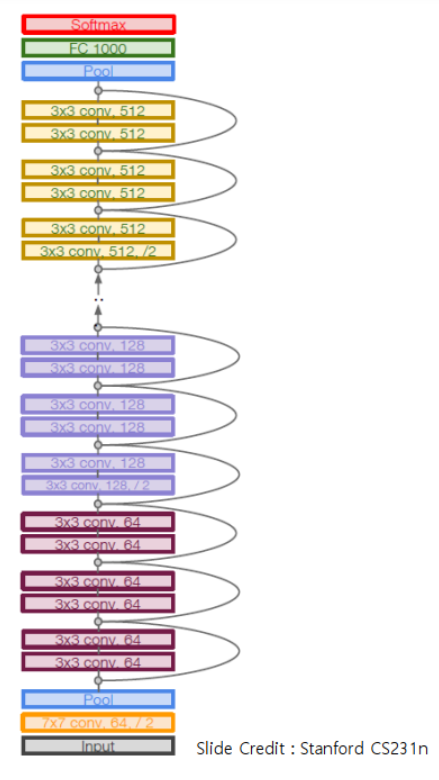

<br>
<br>

- Residual block들을 쌓는 구조
    - 일반 Convolution Layer(backbone)을 먼저 쌓고 Identity(Residual) block들을 계속 쌓는다.
- 모든 Identity block은 두개의 3X3 conv layer로 구성됨.
- 일정 레이어 수별로 filter의 개수를 두배로 증가시키며 stride를 2로 하여 downsampling 함. (Pooling Layer는 Identity block의 시작과 마지막에만 적용)

### 결과

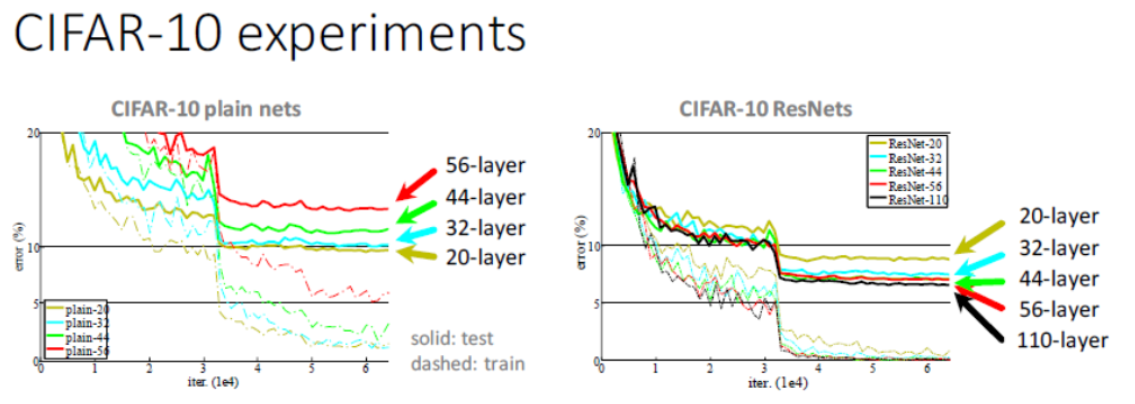

## <span style='background-color:#fff5b1'>MobileNet


### 개요
딥러닝을 이용한 어플리케이션이 항상 고성능 컴퓨터에서 실행되는 것은 아니다. 스마트폰이나 마이크로 디바이스와 같이 저성능 환경에서 실행해되야 하기도 한다. 이런 저성능 컴퓨팅 환경에서 실행할 수 있도록 하기 위해 딥러닝 네트워크를 가볍게 구성하는 (경량 네트워크-Small Deep Neural Network) 방법에 대한 연구가 활성화 되었다.
저성능 환경에서 실행되기 위해서는 다음과 같은 사항들을 만족시킬 수 있어야 한다.

- 적은 연산량(낮은 계산의 복잡도)을 통한 빠른 실행
- 작은 모델 크기
- 충분히 납득할 만한 정확도
- 저전력 사용

즉 기존의 성능만을 신경쓴 모델 보다 <span style='background-color:#fff5b1'>**적은 연산량으로 빠르게 추론할 수 있으되 납득할 수 있는 성능을 내야 한다.**

### Small Deep Neural Network위한 방법
- <span style='background-color:#fff5b1'>**Channel Reduction**
    - Channel의 개수를 줄인다.

- <span style='background-color:#fff5b1'>**Distillation & Compression**
    - Distillation
        - 큰 모델(Teacher Model)이 미리 학습한 정보(Knowledge)를 작은 모델에 전달하여 성능을 향상시키는 기법.
    - Compression
        - 모델 가지치기(Model Pruning-중요도가 떨어지는 파라미터를 0으로해 크기를 줄인다.)등의 기법들을 이용해 네트워크기 크기를 줄이는 기법.

- <span style='background-color:#fff5b1'>**Depthwise Seperable Convolution**
    - Depthwise Convolution과 Pointwise Convolution Layer를 연결한 모델을 구성하여 <span style='background-color:#fff5b1'>**연산량을 줄인다.**
    - <span style='background-color:#fff5b1'>Pointwise Convolution Layer은 채널을 조절할때 사용.(shape을 맞출때 사용)

- <span style='background-color:#fff5b1'>Remove Fully-Connected Layers
    - Fully Connected(Dense) Layer들을 Convolution Layer로 대체한다. Convolution Layer는 파라미터를 공유하므로 파라미터 개수가 줄어들어 Network이 경량화된다.

- <span style='background-color:#fff5b1'>Kernel Reduction
    - Kernel(Filter)의 크기를 줄여서 연산량과 파라미터의 수를 줄인다. => 필터의 크기를 줄인다.

- <span style='background-color:#fff5b1'>Early Spaced Downsampling
    - CNN은 Layer block (Conv, pooling)을 거칠수록 output의 size를 줄이는 downsampling을 하게 된다. Downsampling을 **초반(bottom)에 크게 하면 네트워크의 크기는 줄어들지만 이미지의 특성을 많이 잃어버리게 되어 성능이 낮아지고, 후반(top)에 많이 하게 되면 성능은 좋아지지만 네트워크의 크기는 크게 줄지 않게 된다.** 그래서 전체적으로 균일하게 Downsampling을 하되 그 시점을 튜닝을 통해 찾는다.

>- <span style='background-color:#fff5b1'><font size='5'>Mobilenet은 위의 기법 중</font>
>    - <span style='background-color:#fff5b1'><font size='3'>**Channel Reduction**
>    - <span style='background-color:#fff5b1'>**Distillation & Compression**
>    - <span style='background-color:#fff5b1'>**Depthwise Seperable Convolution**</span>을 적용하여 경량 네트워크를 구현한 모델이다.</font>

## Depthwise Separable Convolution
- Depthwise Convolution 구조에 Pointwise Convolution 구조를 합쳐 기존 Convolution layer보다 연산량을 줄여서 속도를 증가시킨다.

### <span style='background-color:#fff5b1'>Depthwise Convolution
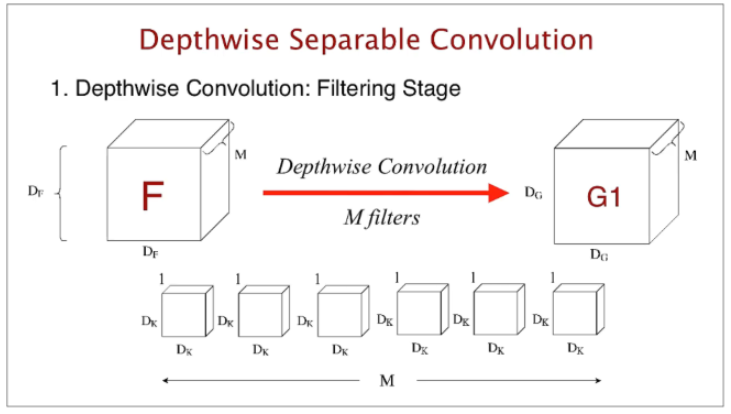

표준 Convolution은 한개의 Filter가 Input의 채널 전체에 대해 Convolution 연산을 한다. 그에 비해 **Depthwise Convolution은 한개의 Filter는 한개의 Channel에만 Convolution 연산을 한다.**


m 은 채널의 개수

위 그림을 보면 Input Data의 shape이 ($D_F$, $D_F$, $M$)일 경우 ($D_k$,$D_k$,$1$) shape의 필터 M개를 생성한다. 그리고 한개의 필터가 하나의 Channel(M개)에 대해 Convolution 연산을 처리한다. 그래서 필터를 거친 Output은 ($D_G$, $D_G$, $M$)의 shape이 된다.

### <span style='background-color:#fff5b1'>Pointwise Convolution

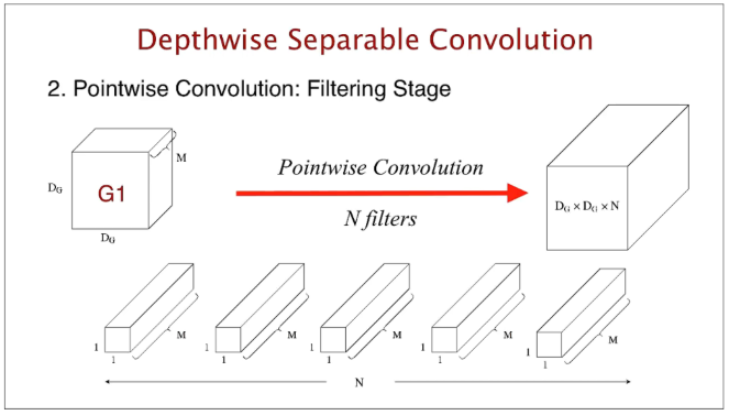
- Pointwise Convolution은 1 X 1 필터를 이용해 Convolution 연산을 처리한다. 
- Pointwise Convolution을 사용하는 구조를 **Bottlenet** 이라고 한다. 
- 이 구조는 height와 width를 유지하면서 Channel의 크기를 조절 하기 위하여 사용된다.

위 이미지를 보면 Input Shape이 ($D_G$, $D_G$, $M$) 일때 ($1$, $1$, $M$) shape의 필터를 $N$개 사용하여 Convolution 연산을 한다. 표준 Convolution연산을 진행하므로 filter의 channel 크기는 input과 동일한 $M$개이며 필터의 개수인 $N$으로 Output의 channel을 결정한다.  그래서 Output의 결과는 ($D_G$, $D_G$, $N$) 이 된다. 1 X 1 필터를 사용하므로 출력 결과의 width, height는 변경되지 않는다. (stride를 1로 지정)  

위 두단계의 convolution연산을 이어서 진행 하여 표준 Convolution에 비해 **Depthwise convolution으로 연산량을 줄이고 pointwise convolution으로 출력 결과의 shape은 동일하게** 만들어 준다.

## 표준 Convolution과 Depthwise Separable Convolution의 연산량 비교

### 표준 Convolution 연산량

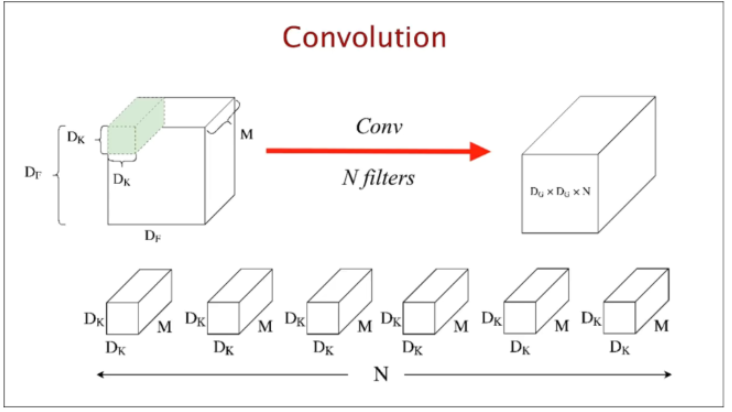
<center>표준 Convolution 연산</center>

- Input Image shape: ($D_F$, $D_F$, $M$)
- Filter shape: ($D_K$, $D_K$, $M$) X N개
    - channel은 input의 channel과 동일
- Convolution연산 이동 횟수:  ($D_G$, $D_G$)
- Output shape: ($D_G$, $D_G$, $N$)
![img](figures/conv.gif)
- <span style='background-color:#fff5b1'>**연산량**
    - 한번의 연산량: $D_k^2 \times M$
    - 하나의 필터의 연산량: $D_G^2 \times D_k^2 \times M$
        - 가로, 세로방향으로 $D_G$ 만큼 이동하므로 한번 연산량에 $D_G^2$ 곱한 만큼 연산한다.
    - N개의 Filter(Kernel)의 연산량: $N \times D_G^2 \times D_k^2 \times M$

- **Depthwise Separable Convolution**은 출력결과 형태(shape)은 동일하면서 연산량을 줄이는 것이 목표이다.

### Depthwise Separable Convolution 연산량

#### Depthwise Convolution 연산량
- 한번의 연산량: $D_K^2$ 
    - Filter한개가 하나의 Channel과 연산한다.
- 1개 Channel에 대한 연산량: $D_G^2 \times D_K^2$ 
    - $D_G$가 가로,세로방향 이동 횟수이다.
- <span style='background-color:#fff5b1'>M개의 Filter의 연산량: $M \times D_G^2 \times D_K^2$ 

#### Pointwise Convolution 연산량
- 한번의 연산량: M
    - 1 x 1 필터이므로 한번 연산은 channel 개수만큼 연산한다.
- 1개 Filter(Kernel)의 연산량: $D_G^2 \times M$
- N개 필터의 연산량: $N \times D_G^2 \times M$

####  Depthwise Separable Convolution 연산량
- **Depthwise Convolution연산량 + Pointwise Convolution 연산량**

$$
M \times D_G^2 \times D_K^2 + N \times D_G^2 \times M\\
= \\
M \times D_G^2(D_K^2 + N)
$$

### 표준 Convolution 과 Depthwise Separable Convolution 연산량 비교

$$
\cfrac{Depthwise Separable}{표준 Convolution} \\
= \\
\cfrac{M \times D_G^2(D_K^2 + N)}{N \times D_G^2 \times D_K^2 \times M} \\
= \\
\cfrac{D_K^2 + N}{D_K^2 \times N} \\
= \\
\cfrac{1}{N} + \cfrac{1}{D_K^2}
$$
- $D_K$: Filter의 height, width
- $D_G$: Convolution의 이동 횟수. Output(Feature map)의 height, width
- $M$: Input의 channel
- $N$: Filter 개수

#### 필터의 개수(N)이 1024이고 필터 크기($D_K$)가 3인경우. 즉 (3,3) 필터 1024개를 사용한 경우 연산량이 $\cfrac{1}{9}$ 정도 줄어든다.

In [1]:
result = (1/1024) + (1/3**2)
print(result)

0.1120876736111111


이미지출처: https://www.youtube.com/watch?v=T7o3xvJLuHk